# Sprint3課題 機械学習スクラッチ線形回帰

## 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

### データ準備

In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("train.csv")

In [2]:
#GrLivAreaとYearBuiltを抜き出す
X = df_train.loc[:, ['GrLivArea', 'YearBuilt']].values

#目的変数SalePriceを抜き出す
y = df_train.loc[:, ['SalePrice']].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [4]:
#標準化にする関数
def standardize(data):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean) / std

In [5]:
# 標準化
X_std = standardize(X_train)
X_validation_std = standardize(X_validation)
#１列目を標準化
x1 = X_std[:,0]

#2列目を標準化
x2 = X_std[:,1]

#形を揃える
y = y_train.reshape(-1)
y_validation = y_validation.reshape(-1)

#データ数を確認
m = len(X)

#イテレーション数
num_itr = 5

#学習率
lr = 0.5

### 特徴量が二つの場合の検証

In [6]:
#パラメータの初期化
theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()

for i in range(num_itr):
    #仮定関数
    hypothsis = theta0 + theta1 * x1 + theta2 * x2

    # 損失関数
    cost_function = np.sum(((hypothsis - y) ** 2 )) / 2 * m
    
    #損失関数出力
    print('{}回目'.format(i+1))
    print('損失関数 : {}'.format(cost_function))
    print('theta0 : {}\ntheta1 : {}\ntheta2 : {}\n'.format(theta0, theta1, theta2))
    
    #最急降下法によりパラメータ更新
    theta0 = theta0 - (np.sum(hypothsis - y) * lr / m) 
    theta1 = theta1 - (np.sum((hypothsis - y) * x1) * lr / m) 
    theta2 = theta2 - (np.sum((hypothsis - y) * x2) * lr / m) 


1回目
損失関数 : 3.1246951786704276e+16
theta0 : 0.72140169990072
theta1 : 0.46324218533968076
theta2 : 0.4618815760825007

2回目
損失関数 : 1.302846482683154e+16
theta0 : 68142.55841030902
theta1 : 20248.76124787874
theta2 : 15168.24256664072

3回目
損失関数 : 6063863039363567.0
theta0 : 110731.20654068972
theta1 : 31950.578695079934
theta2 : 23375.40145844958

4回目
損失関数 : 3390744782885396.5
theta0 : 137349.11162217765
theta1 : 38748.35473591769
theta2 : 27769.35961066623

5回目
損失関数 : 2361261091971284.0
theta0 : 153985.30229810762
theta1 : 42720.783115243896
theta2 : 30088.310160881272



### 特徴量がn個の場合の検証

In [7]:
#x0（全て1）を０列目に挿入する
X_std_0 = np.insert(X_std, 0, 1, axis=1)

#n(特徴量の数+1)を算出
n = X_std_0.shape[1]

# パラメータの初期化
theta = np.random.rand(1, n)

for i in range(num_itr):

    #仮定関数を求める
    hypothesis = np.dot(X_std_0, theta.T).reshape(-1)

    # 損失関数
    cost_function = np.sum(((hypothesis - y) ** 2 )) / 2 * m
    
    print('{}回目'.format(i+1))
    print('損失関数 : {}\n'.format(cost_function))
    
    #最急降下法によりパラメータ更新
    theta = theta - (np.dot((hypothesis - y), X_std_0) * lr / m)

1回目
損失関数 : 3.1247080769422176e+16

2回目
損失関数 : 1.30285163505225e+16

3回目
損失関数 : 6063883634465960.0

4回目
損失関数 : 3390753027269508.5

5回目
損失関数 : 2361264399735458.0



### 関数としてまとめる

In [31]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        #仮定関数を求める
        hypothesis = np.dot(X, self.coef_.T).reshape(-1)

        return hypothesis
    
    
    
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """    
        mse = np.sum((y_pred - y) ** 2 ) / 2 * len(y)

        return mse
    
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法にてパラメータを更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        error : 次の形のndarray, shape (n_samples,)
          仮定関数から目的関数を差し引いたもの

        Returns
        ----------
        self.coef_ : 次の形のndarray, shape (n_features,)
          更新後のパラメータ
        """

        #最急降下法によりパラメータ更新
        self.coef_ = self.coef_ - (np.dot(error, X) * self.lr / len(X))

        return self.coef_


    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
            
        Returns
        -------
        self : returns an instance of self.            
            
        """
        #バイアス項を含める場合は、
        if self.bias is False:
            #x0（全て1）を０列目に挿入する
            X_0 = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合はそのまま
        else:
            X_0 = X

        #n(特徴量の数+1)を算出
        n = X_0.shape[1]

        # パラメータの初期化
        self.coef_ = np.random.rand(1, n)
        
        m = len(X_0)
        
        #イテレーションの数だけパラメータを更新する
        for i in range(self.iter):

            #仮定関数を求める
            hypothesis = self._linear_hypothesis(X_0)
            
            error = hypothesis - y

            # 損失関数
            cost_function = self.MSE(hypothesis, y)
            
            #損失関数を記録する
            self.loss[i] = cost_function
            
            #最後の一回はパラメータ更新なし
            if i <= self.iter - 1:
                #最急降下法によりパラメータ更新
                self.coef_ = self._gradient_descent(X_0, error)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                map_result = map(str, self.loss)
                result = ',\n'.join(map_result)                
                print('学習データ　MSE : \n{}'.format(result))
                
        if X_val is not None:
            #バイアス項を含める場合は、
            if self.bias is False:
                #x0（全て1）を０列目に挿入する
                X_val_0 = np.insert(X_val, 0, 1, axis=1)
            #バイアス項を入れない場合はそのまま
            else:
                X_val_0 = X_val

            #n(特徴量の数+1)を算出
            n = X_val_0.shape[1]

            # パラメータの初期化
            self.coef_ = np.random.rand(1, n)

            m = len(X_val_0)

            #イテレーションの数だけパラメータを更新する
            for i in range(self.iter):

                #仮定関数を求める
                hypothesis_val = self._linear_hypothesis(X_val_0)

                error_val = hypothesis_val - y_val

                # 損失関数
                cost_function_val = self.MSE(hypothesis_val, y_val)

                #損失関数を記録する
                self.val_loss[i] = cost_function_val

                #最後の一回はパラメータ更新なし
                if i <= self.iter - 1:
                    #最急降下法によりパラメータ更新
                    self.coef_ = self._gradient_descent(X_val_0, error_val)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                map_result = map(str, self.val_loss)
                result = ',\n'.join(map_result)                
                print('検証データ　MSE : \n{}'.format(result))
        
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #バイアス項を含める場合は、
        if self.bias is False:
            #x0（全て1）を０列目に挿入する
            X_0 = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合はそのまま
        else:
            X_0 = X

        return np.dot(X_0, self.coef_.T)

In [32]:
slr = ScratchLinearRegression(num_iter=10, lr=0.5, bias=False, verbose=True)

In [33]:
slr.fit(X=X_std, y=y, X_val=X_validation_std, y_val=y_validation)

学習データ　MSE : 
2.343526807308248e+16,
6651926848240840.0,
2597499291031397.0,
1607723315799573.5,
1364181163810634.5,
1303894436936824.2,
1288900217067273.5,
1285156128783718.0,
1284217829639453.0,
1283981820628382.2
検証データ　MSE : 
2590174296394319.5,
724984003328786.1,
291009411381889.44,
185949505181115.2,
159894855257608.44,
153319192573869.94,
151630585448618.3,
151187221078997.12,
151067097690987.1,
151033090367629.25


In [146]:
slr.predict(X_validation_std)[:10]

array([[127611.33806146],
       [321781.6957144 ],
       [ 87791.44500564],
       [174492.62750392],
       [229215.25213399],
       [ 90429.70607777],
       [197091.54713144],
       [183273.03326767],
       [ 88451.30232292],
       [153892.80497396]])

### pyファイル(regression_pipeline.py)へモジュール化・検証

In [12]:
# モジュール配置されているパスを取得
import sys
sys.path.append("/Users/yusuke-saruya/diveintocode-ml/full-time/diveintocode-term1/ml-scratch/utils/")
import regression_pipeline

In [142]:
slr2 = regression_pipeline.ScratchLinearRegression(num_iter=1000, lr=0.01, bias=False, verbose=False)

In [143]:
slr2.fit(X=X_std, y=y, X_val=X_validation_std, y_val=y_validation)

In [145]:
slr2.predict(X_validation_std)[:10]

array([[127697.2430062 ],
       [322198.36270032],
       [ 88073.0864728 ],
       [174867.20857734],
       [229227.24155161],
       [ 90319.46793052],
       [197607.83753775],
       [183399.39827969],
       [ 88352.6686301 ],
       [154131.91995169]])

## 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

<function matplotlib.pyplot.show(*args, **kw)>

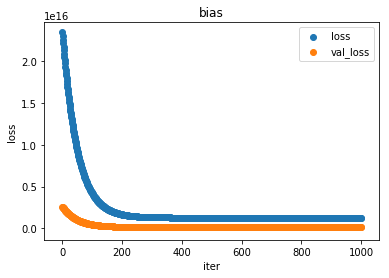

In [16]:
plt.scatter(np.array(range(slr2.iter)), slr2.loss, label="loss")
plt.scatter(np.array(range(slr2.iter)), slr2.val_loss, label="val_loss")

plt.title("bias")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show

## 【問題3】（アドバンス課題）バイアス項の除去
バイアス項$θ_0$を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。



In [147]:
slr2_nobias = regression_pipeline.ScratchLinearRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
slr2_nobias.fit(X=X_std, y=y, X_val=X_validation_std, y_val=y_validation)

<function matplotlib.pyplot.show(*args, **kw)>

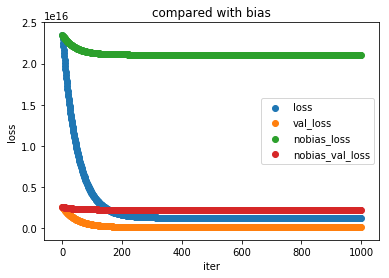

In [148]:
plt.scatter(np.array(range(slr2.iter)), slr2.loss, label="loss")
plt.scatter(np.array(range(slr2.iter)), slr2.val_loss, label="val_loss")
plt.scatter(np.array(range(slr2_nobias.iter)), slr2_nobias.loss, label="nobias_loss")
plt.scatter(np.array(range(slr2_nobias.iter)), slr2_nobias.val_loss, label="nobias_val_loss")



plt.title("compared with bias")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show

### 考察・調査
- 上図にて、バイアス項を利用しない場合、バイアス項を利用する場合より損失関数が大きい値の状態で収束してしまう
- バイアス項を加えるとは、重みを一つ追加するのと同じ。バイアス項を加えることで、重み付き入力を偏らせることが出来る。
- バイアス項がないということは、平面上の一次関数では切片がないということ。原点を通る回帰グラフでしか予測することができないため、予測を行なった際の損失が増大してしまう。

## 【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [149]:
#元の特徴量にて学習結果を確認
slr2_1 = regression_pipeline.ScratchLinearRegression(num_iter=1000, lr=10e-9, bias=True, verbose=False)
slr2_1.fit(X=X_train, y=y_train.reshape(-1))

In [151]:
#特徴量に二乗を行い、学習結果を確認
slr2_2 = regression_pipeline.ScratchLinearRegression(num_iter=1000, lr=10e-16, bias=True, verbose=False)
slr2_2.fit(X=X_train**2, y=y_train.reshape(-1))

In [153]:
#特徴量に三乗を行い、学習結果を確認
slr2_3 = regression_pipeline.ScratchLinearRegression(num_iter=1000, lr=10e-23, bias=True, verbose=False)
slr2_3.fit(X=X_train**3, y=y_train.reshape(-1))

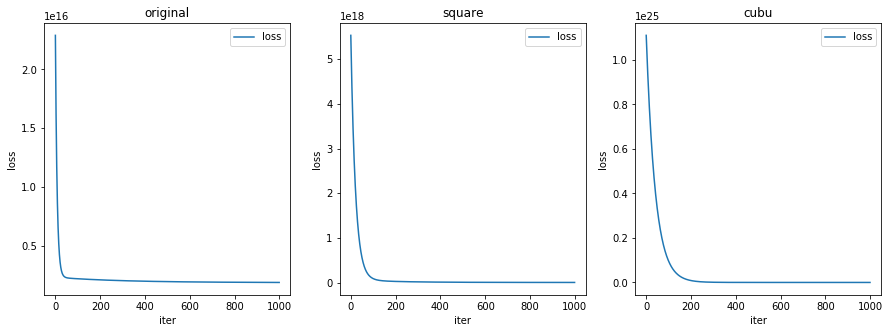

In [154]:
plt.figure(figsize=(15, 5)) # figureの縦横の大きさ

plt.subplot(1,3,1)
plt.plot(slr2_1.loss, label="loss")
plt.title("original")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

 
plt.subplot(1,3,2)
plt.plot(slr2_2.loss, label="loss")
plt.title("square")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()


plt.subplot(1,3,3)
plt.plot(slr2_3.loss, label="loss")
plt.title("cubu")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

### まとめ
- 二乗、三乗を行うごとに学習率を小さくする必要ある（学習率が大きいと、損失がそのまま増大し続けて発散してしまう）
- 収束が行われ、最終的に算出された損失は二乗、三乗を行うごとに増大していく。

## 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$
    \theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}[(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}]
$$

以下の式から説明をはじめることができます。

$$
    \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
$$


### 導出過程

仮定関数：$h\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots +\theta_j x_j + \cdots +\theta_n x_n$  
目的関数：$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{i}) - y^{(i)})^2$


$$
        \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
$$
より、更新式の偏微分を行う。ここで、

$$
    u = J(\theta) \\
    v = h_{\theta}(x)
$$
とすると、

$$
    \frac{\partial u}{\partial \theta_j} = \frac{\partial u}{\partial v} \cdot \frac{\partial v}{\partial \theta_j}
$$

にて、合成関数の微分を行う。

①$\frac{\partial u}{\partial v}$

$$
\begin{eqnarray}
    \frac{\partial u}{\partial v} &=& \frac{\partial}{\partial v} J(\theta) \\
        &=& \frac{\partial}{\partial v}(\frac{1}{2m}\sum_{i=1}^{m}(v - y^{(i)}))^2 \\
        &=& \frac{1}{2m}\sum_{i=1}^{m} \frac{\partial}{\partial v}(v^2 -2vy^{(i)} + y^{(i)2}) \\
        &=& \frac{1}{2m}\sum_{i=1}^{m} (2v - 2y^{(i)}) \\
        &=& \frac{1}{m}\sum_{i=1}^{m} (v - y^{(i)})
\end{eqnarray}
$$

②$\frac{\partial v}{\partial \theta_j}$

$$
\begin{eqnarray}
    \frac{\partial v}{\partial \theta_j} &=& \frac{\partial}{\partial \theta_j} h_{\theta}(x) \\
        &=& \frac{\partial}{\partial \theta_j}(\theta_0 x_0 + \theta_1 x_1 + \cdots +\theta_j x_j + \cdots +\theta_n x_n) \\
        &=& x_j
\end{eqnarray}
$$

①、②より、

$$
\begin{eqnarray}
    \frac{\partial u}{\partial \theta_j} = \frac{\partial u}{\partial v} \cdot \frac{\partial v}{\partial \theta_j}\\
        &=& \frac{1}{m}\sum_{i=1}^{m} (v - y^{(i)}) \cdot x_j^{(i)} \\
        &=& \frac{1}{m}\sum_{i=1}^{m} [(v - y^{(i)}) x_j^{(i)}]
\end{eqnarray}
$$

よって、

$$
\begin{eqnarray}
    \theta_j &:=& \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) \\
    \theta_j &:=& \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}[(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}]
\end{eqnarray}
$$

## 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

### 回答
今回の線形回帰では、最小化を行う目的関数（損失関数）（$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{i}) - y^{(i)})^2$）が二次関数であり、この目的関数における極小値（下に凸の二次関数であれば、底の部分）を捉えることにより、最適解を求めることができる。  
※数学的解釈はできませんでした。

## 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

- ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か

**注意点**

感想ではなく、他人を納得させられるような内容にしてください。

### 回答
- ライブラリの理解  
ライブラリで用いられている各種パラメータが、どの関数に対してどれほど影響を受けることになるのか実装を行う中で確かめることができる

- オブジェクト指向プログラミングの訓練  
ライブラリとしてどのように動くのかの"答え"が用意されているため、動きを確認して正しく実装ができているか、オブジェクト指向の視点からも実装訓練を行うことができる